In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 한글 폰트 지원
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# Seaborn

- https://seaborn.pydata.org/
- matplotlib의 기능에 스타일을 확장한 파이썬 시각화 도구
- high-level interface
- 패키지는 설치해야 함(pip install seaborn)
    - 아나콘다에 seaborn 패키지 포함되어 있으므로 이미 설치되어 있음
- seaborn을 사용하기 위해서는 matplotlib가 import 되어 있어야 함

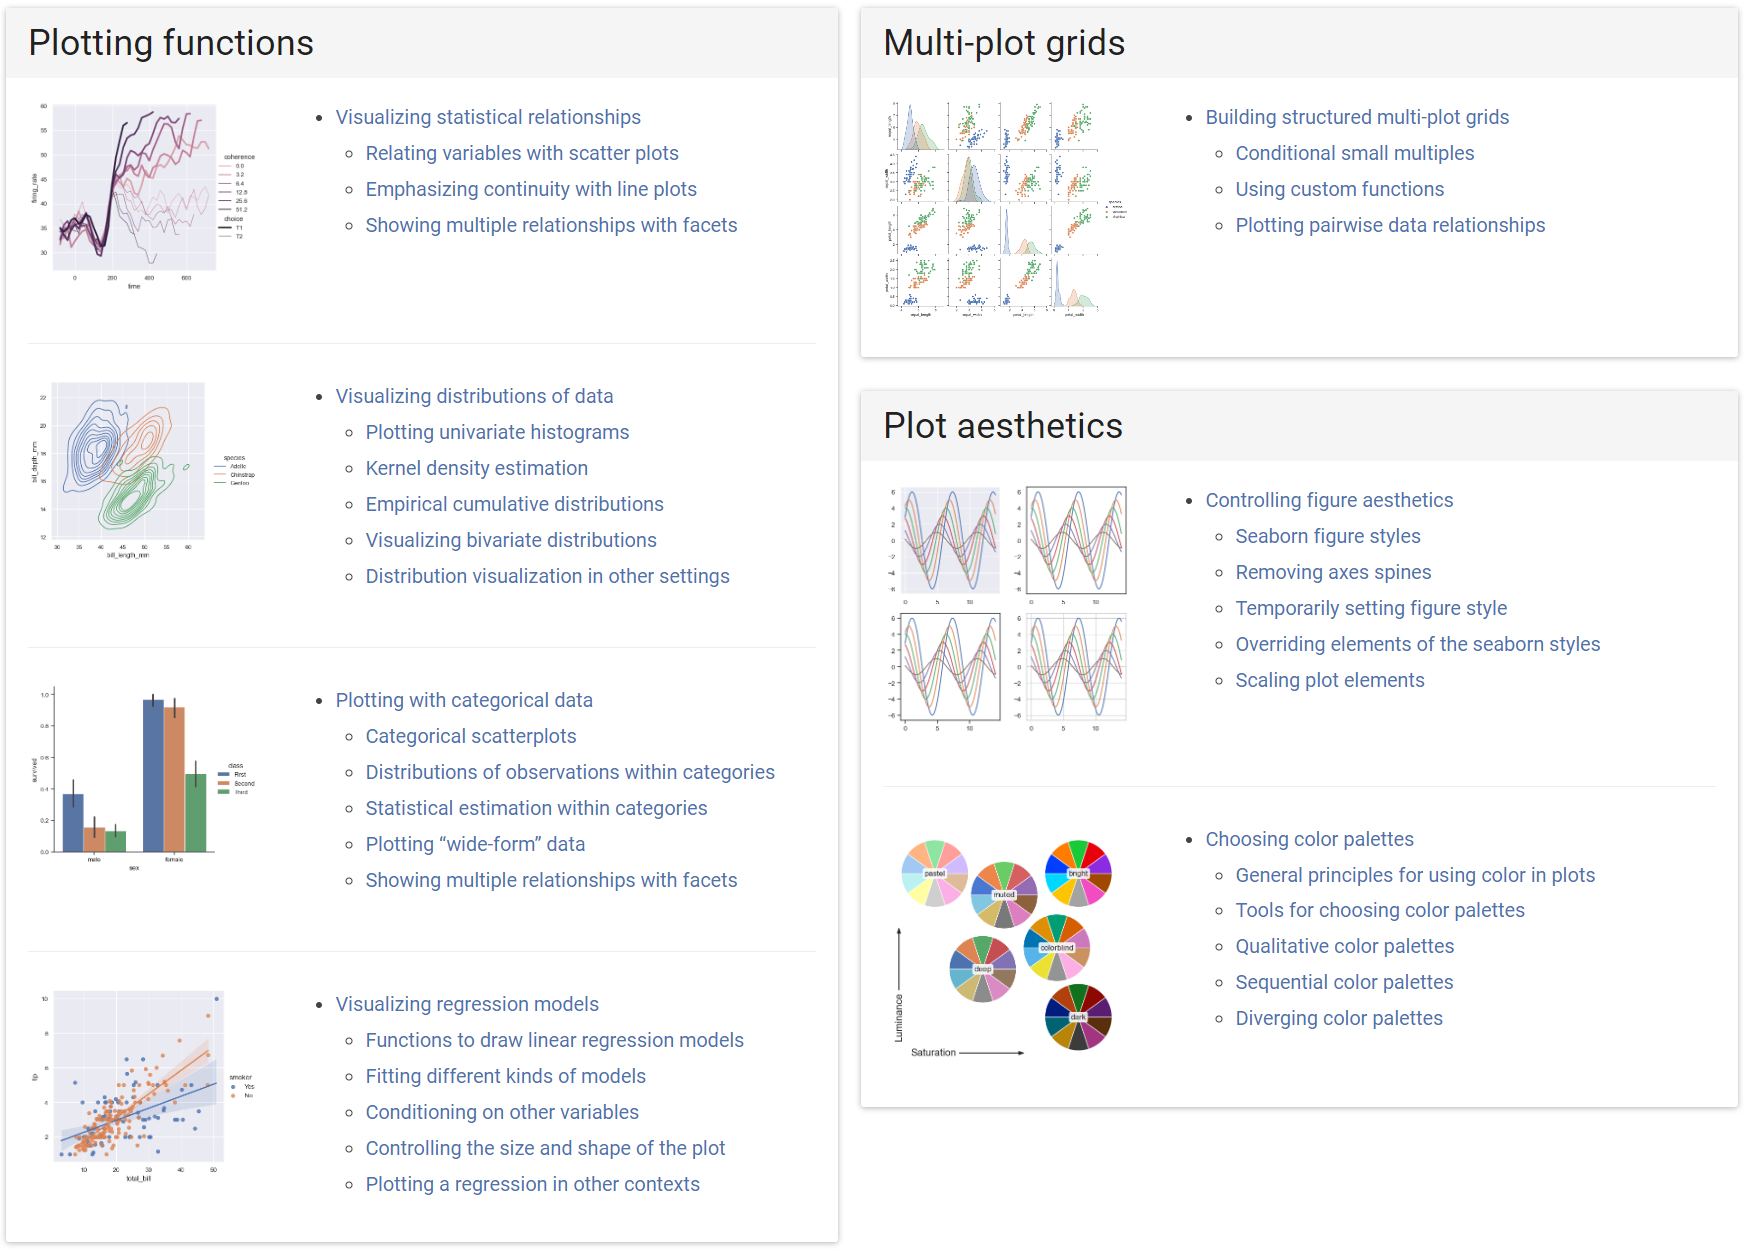

- https://seaborn.pydata.org/examples/index.html
- https://seaborn.pydata.org/tutorial.html

## 패키지 임포트

In [3]:
import seaborn as sns

## 지원되는 플롯 유형

- Relational plots
- Distribution plots
- Categorical plots
- Regression plots
- Multi-plot grids
- Figure theming
- Color palettes

![image.png](https://seaborn.pydata.org/_images/function_overview_8_0.png)

------------------------

# 시각화의 목적에 따른 플롯

- 데이터 분포 파악
- 데이터 관계 파악
- 집단간 비교
- 시간에 따른 변화

---

## 1. 데이터 분포(distribution) 파악

- 데이터의 중심(대표), 산포(퍼짐), 왜도, 첨도 등의 분포 특징을 파악하기 위해 사용


- 히스토그램(histogram)
    - matplotlib.pyplot.hist()
    - seaborn.displot(kind='hist')
    - seaborn.histplot()
    - DataFrame.plot(kind='hist')
    - DataFrame.plot.hist()
    

- 박스플롯(boxplot)
    - matplotlib.pyplot.boxplot()
    - seaborn.boxplot()
    - DataFrame.plot(kind='box')
    - DataFrame.plot.box()
    - DataFrame.boxplot()
    

- 커널 밀도 곡선(Kernel Density Estimation plot)
    - seaborn.displot(kind='kde')
    - seaborn.kdeplot()
    - DataFrame.plot(kind='kde')
    - DataFrame.plot.kde()

#### 예제 데이터. iris dataset

In [4]:
iris = sns.load_dataset('iris')

In [5]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 1) 히스토그램(histogram)

- 표로 되어 있는 도수 분포를 그림으로 나타낸 것
- 계급구간, 계급값, 빈도, 상대빈도

### ① matplotlib.pyplot.hist()

- 형식 : hist(x, bins=None, range=None, density=False, cumultive=False, ...)

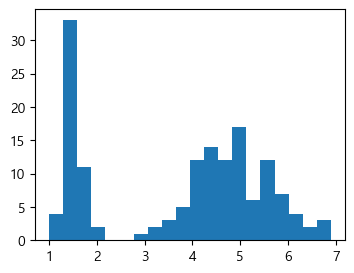

In [11]:
plt.figure(figsize=(4,3))
plt.hist(iris.petal_length, bins=20)
plt.show()

### ② pandas.DataFrame.hist()

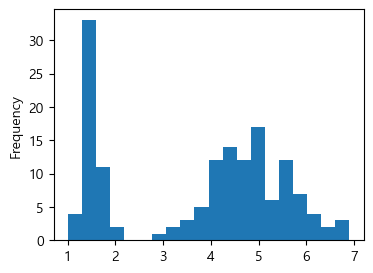

In [13]:
iris['petal_length'].plot(kind='hist', bins=20, figsize=(4,3))
plt.show()

### ③ seaborn의 히스토그램 함수

- 형식1.
    - seaborn.histplot(data, x, y, hue, weights, stat, bins, binwidth, kde, ...)
    - 반환 : ax
    - https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot


- 형식2.
    - displot(kind='hist', x, y, data, hue,...)
    - https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

### sns.histplot()

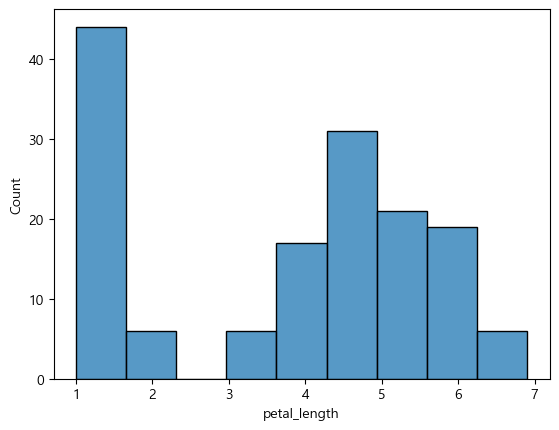

In [14]:
sns.histplot(data=iris, x='petal_length')
plt.show()

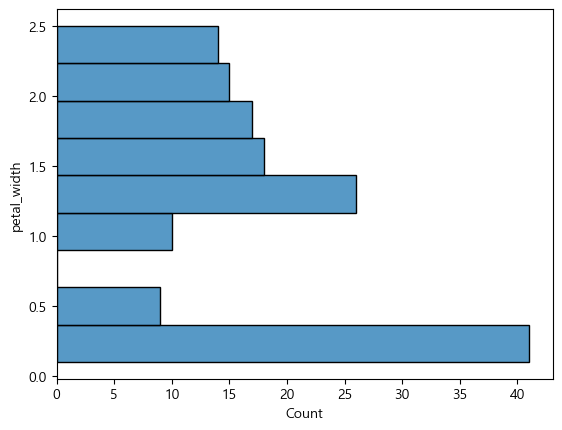

In [15]:
sns.histplot(data=iris, y='petal_width')
plt.show()

<Axes: xlabel='petal_length', ylabel='Count'>

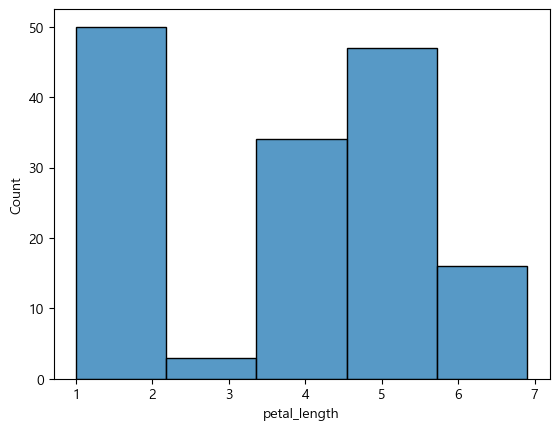

In [16]:
sns.histplot(data=iris, x='petal_length', bins=5)

#### sns.histplot()의 stat인수

- stat='count' : 각 빈의 관측값수
- stat='frequency' : 각 빈의 너비로 나눈 관측값수
- stat='probability' or 'proportion' : 막대 높이의 합이 1이 되도록 정규화
- stat='percent' : 막대 높이 합이 100이 되도록 정규화
- stat='density' : 히스토그램의 전체 면적이 1이 되도록 정규화

<Axes: xlabel='sepal_length', ylabel='Count'>

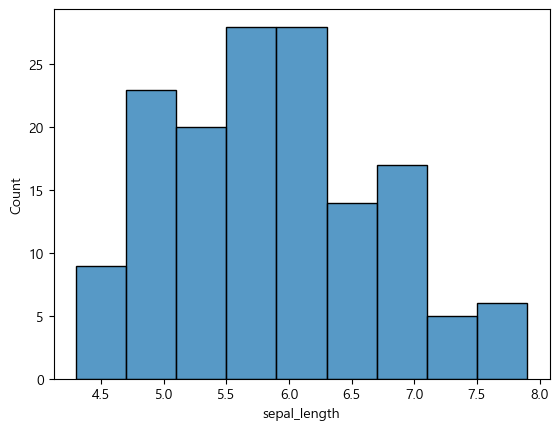

In [17]:
sns.histplot(data=iris, x='sepal_length')

<Axes: xlabel='sepal_length', ylabel='Frequency'>

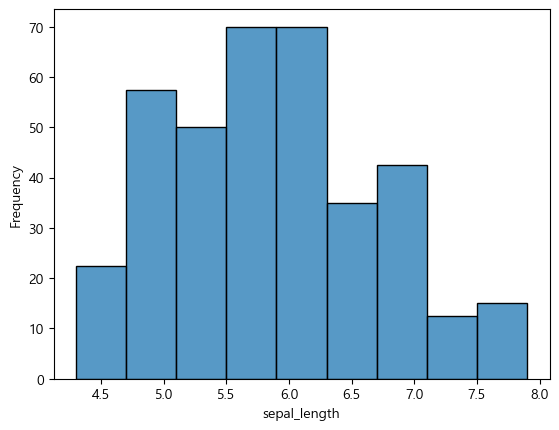

In [18]:
sns.histplot(data=iris, x='sepal_length', stat='frequency')

<Axes: xlabel='sepal_length', ylabel='Probability'>

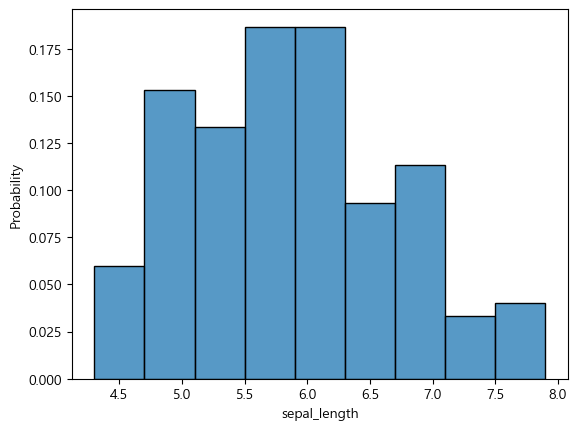

In [19]:
sns.histplot(data=iris, x='sepal_length', stat='probability')

<Axes: xlabel='sepal_length', ylabel='Percent'>

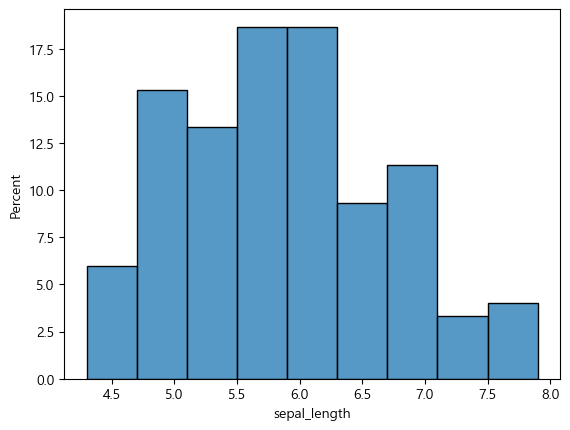

In [20]:
sns.histplot(data=iris, x='sepal_length', stat='percent')

<Axes: xlabel='sepal_length', ylabel='Density'>

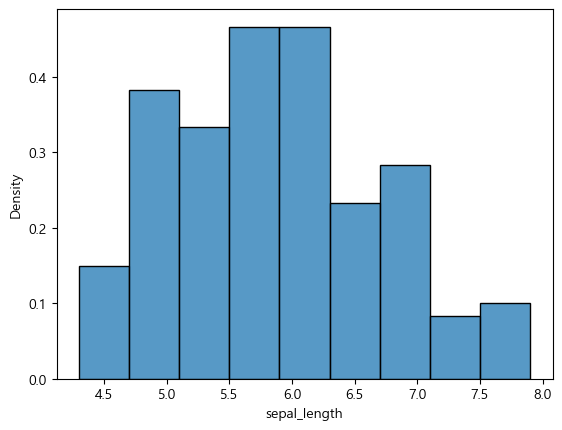

In [21]:
sns.histplot(data=iris, x='sepal_length', stat='density')

#### sns.histplot(kde=True) 사용하여 커널 밀도 함수 곡선 그리기 
- 커널밀도곡선(Kernel Density Estimation curve)을 히스토그램 위에 그림

<Axes: xlabel='petal_width', ylabel='Count'>

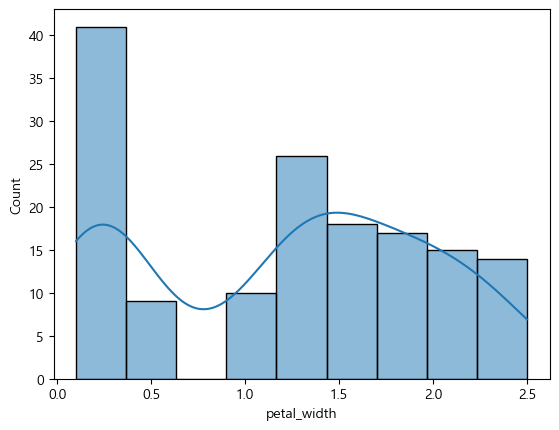

In [22]:
sns.histplot(data=iris, x='petal_width', kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

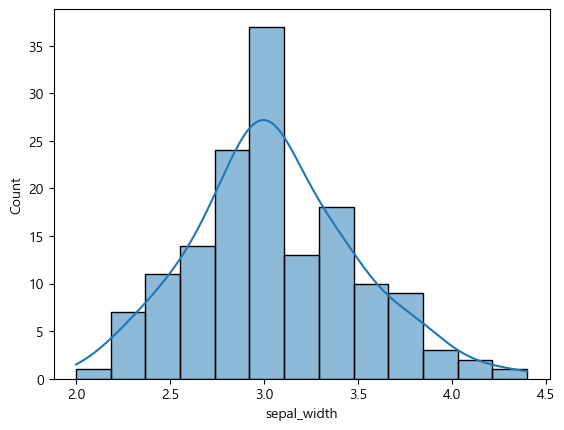

In [23]:
sns.histplot(data=iris, x='sepal_width', kde=True)

#### sns.histplot()의 cumulative인수

<Axes: xlabel='sepal_width', ylabel='Count'>

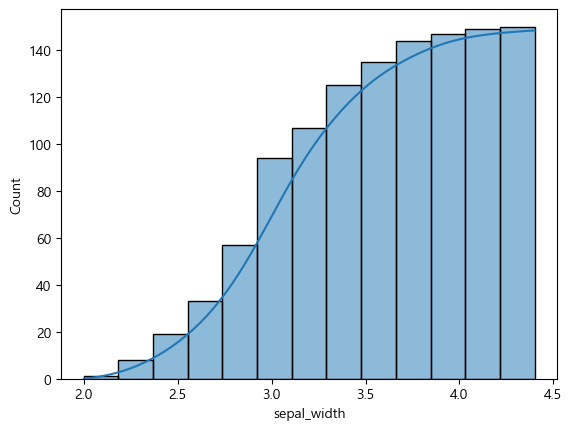

In [27]:
sns.histplot(data=iris, x='sepal_width', cumulative=True, kde=True)

<Axes: xlabel='sepal_width', ylabel='Density'>

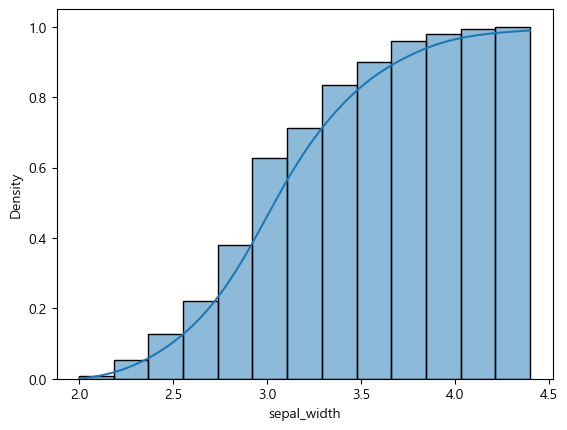

In [29]:
sns.histplot(data=iris, x='sepal_width', stat='density', cumulative=True, kde=True)

#### sns의 histplot()의 data인수만 지정할 경우
- 수치형 데이터들에 대한 히스토그램을 모두 그림

<Axes: ylabel='Count'>

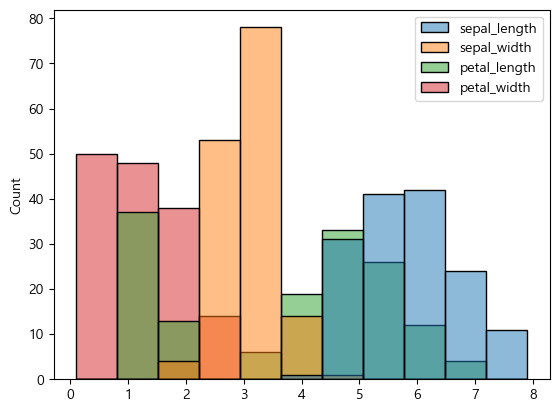

In [30]:
sns.histplot(data=iris)

<Axes: ylabel='Count'>

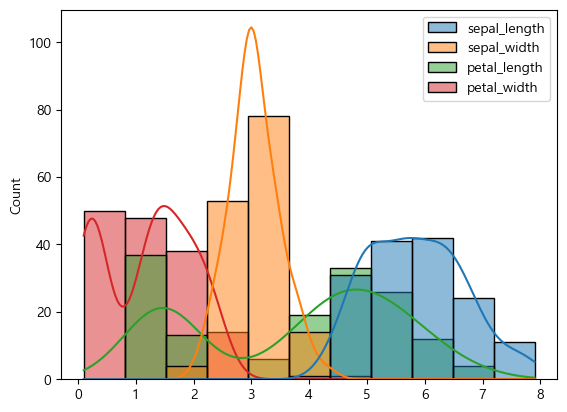

In [31]:
sns.histplot(data=iris, kde=True)

#### sns의 histplot()의 hue인수에 범주형 데이터를 지정할 경우
- 범주형 변수의 그룹별로 히스토그램을 그려 분포 비교 가능

<Axes: xlabel='petal_length', ylabel='Count'>

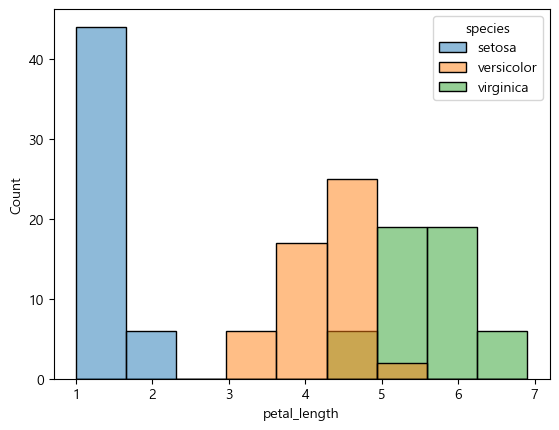

In [33]:
sns.histplot(data=iris, x='petal_length', hue='species')

<Axes: xlabel='sepal_length', ylabel='Count'>

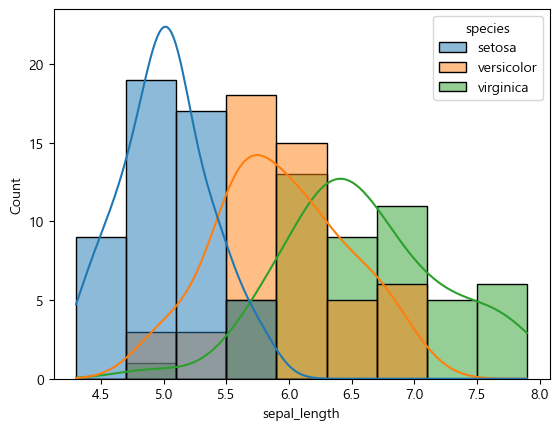

In [36]:
sns.histplot(data=iris, x='sepal_length', hue='species', kde=True)

#### sns의 histplot()의 element 인수 사용

- element = 'step' : 계단모양으로 그림
- element = 'poly' : 다각형으로 그림

<Axes: xlabel='sepal_length', ylabel='Count'>

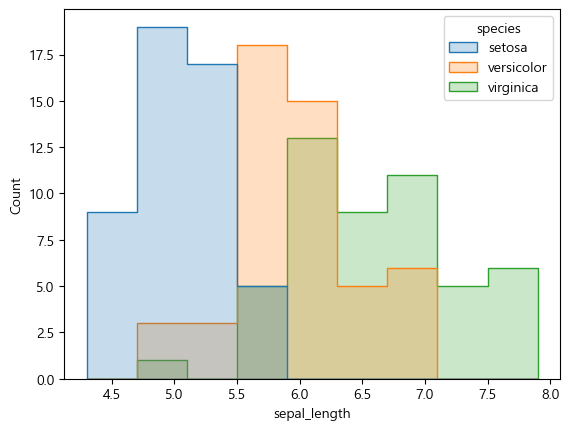

In [37]:
sns.histplot(data=iris, x='sepal_length', hue='species', element='step')

<Axes: xlabel='sepal_length', ylabel='Count'>

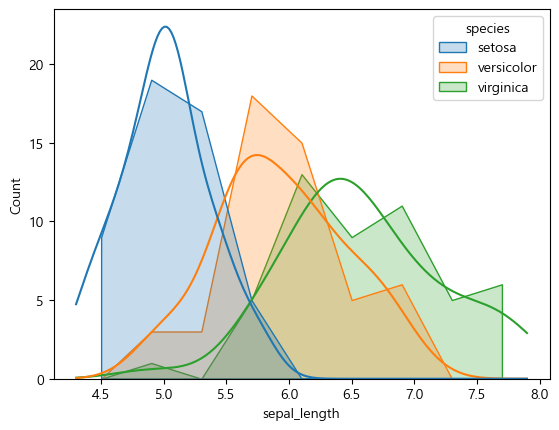

In [39]:
sns.histplot(data=iris, x='sepal_length', hue='species', element='poly', kde=True)

#### sns.histplot()의 multiple인수

두 변수가 지정된 경우만 사용

- multiple='layer'
- multiple='dodge'
- multiple='stack'
- multiple='fill'

<Axes: xlabel='sepal_length', ylabel='Count'>

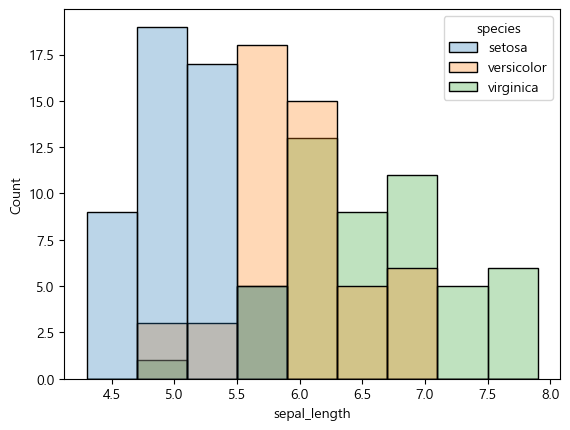

In [45]:
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='layer', alpha=0.3)

<Axes: xlabel='sepal_length', ylabel='Count'>

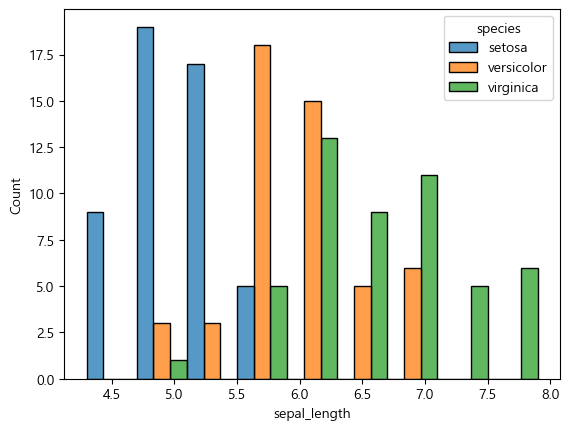

In [41]:
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='dodge')

<Axes: xlabel='sepal_length', ylabel='Count'>

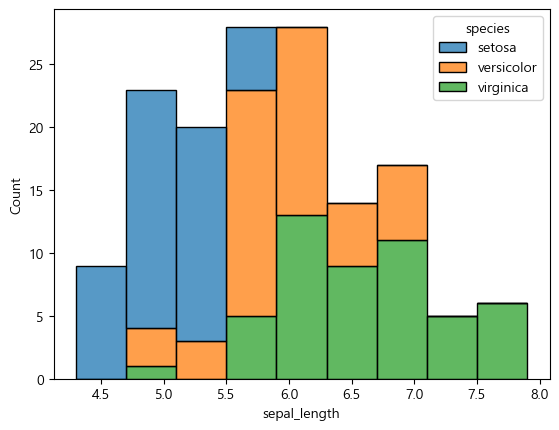

In [43]:
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='stack')

<Axes: xlabel='sepal_length', ylabel='Count'>

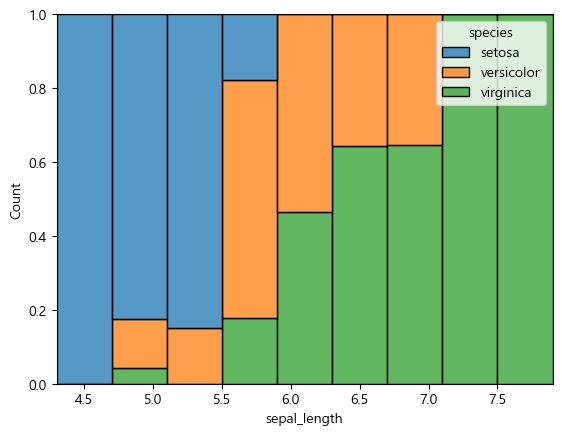

In [44]:
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='fill')

### sns.displot(kind='hist',) 

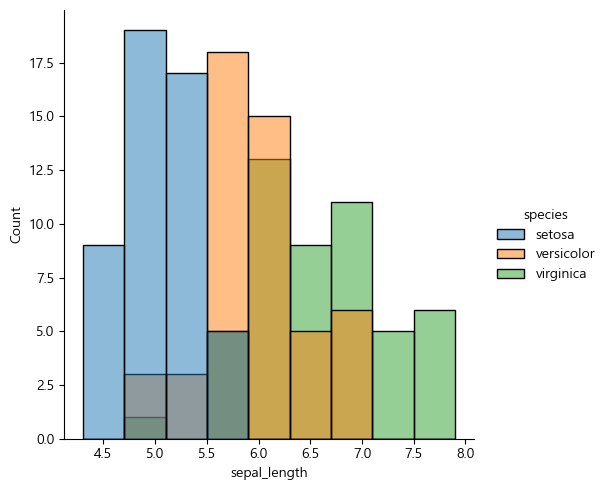

In [47]:
sns.displot(kind='hist', data=iris, x='sepal_length', hue='species')

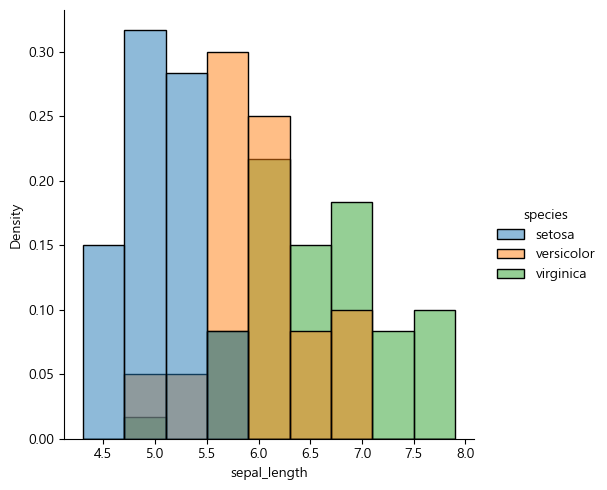

In [48]:
sns.displot(kind='hist', data=iris, x='sepal_length', hue='species', stat='density')

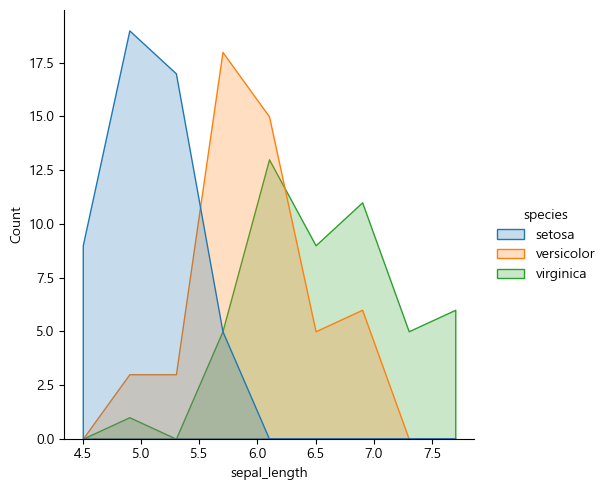

In [49]:
sns.displot(kind='hist', data=iris, x='sepal_length', hue='species', element='poly')

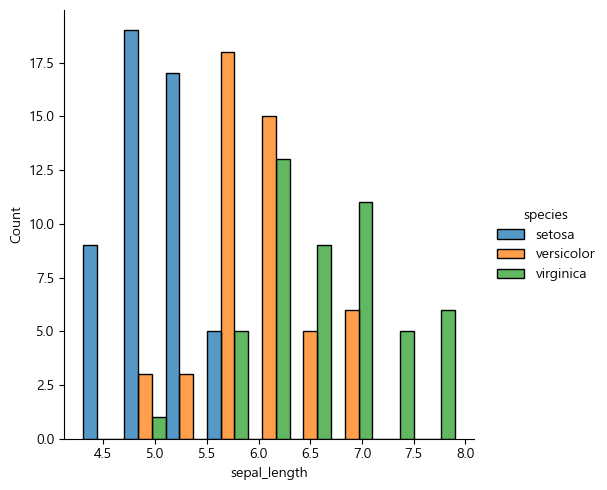

In [50]:
sns.displot(kind='hist', data=iris, x='sepal_length', hue='species', multiple='dodge')

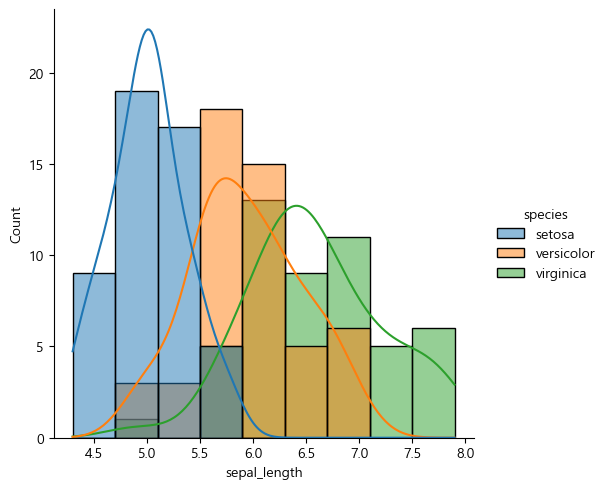

In [51]:
sns.displot(kind='hist', data=iris, x='sepal_length', hue='species', kde=True)

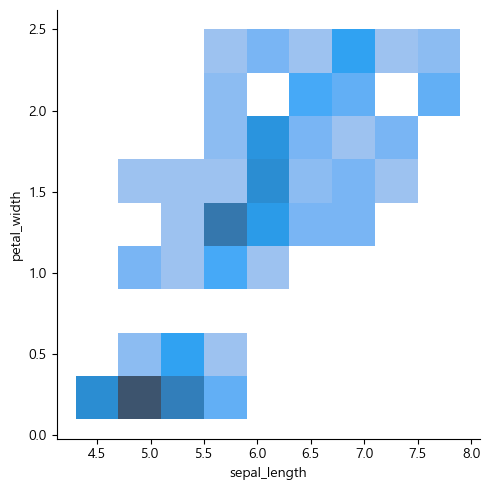

In [52]:
sns.displot(kind='hist', data=iris, x='sepal_length', y='petal_width')

### 2) 박스플롯(boxplot)

- '상자 수염 그림'(box-and-whisker plot) 또는 '상자 그림'(box plot, boxplot)이라 부름
- 수치적 자료를 표현하는 그래프
- 자료로부터 얻어낸 통계량인 5가지 요약 수치(five-number summary)를 가지고 그린다
    - 최소값
    - 제1사분위(Q1, lower quartile)
    - 제2사분위(Q2, median)
    - 제3사분위(Q3, upper quartile)
    - 최대값
    
- 이상치 확인
- 분포의 비대칭 확인

### ① matplotlib.pyplot의 박스플롯 함수

- 형식 : boxplot(x, notch, sym, vert, whis, widths, ...)

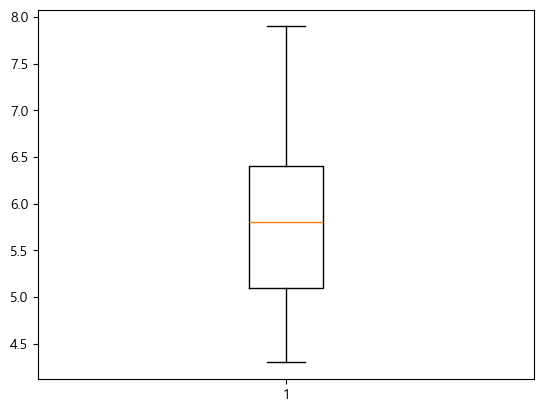

In [53]:
plt.boxplot(iris.sepal_length)
plt.show()

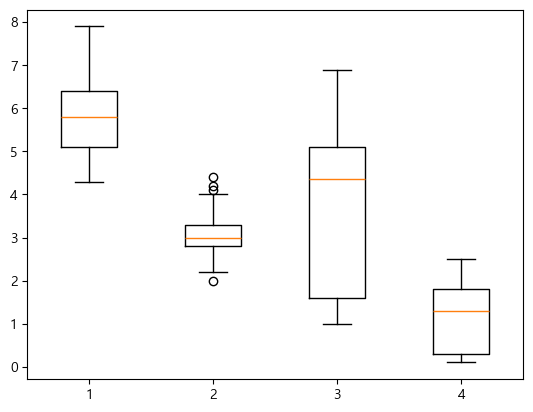

In [56]:
plt.boxplot([iris.sepal_length, iris.sepal_width, iris.petal_length, iris.petal_width])
plt.show()

---------------------------------------------

### ② seaborn의 박스플롯 함수

- 형식1.
    - boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ... )

    - 반환값 : ax (matplotlib Axes)
    
    
- 형식2.
    - catplot(kind='box', x=None, y=None, hue=None, data=None, ... )

<Axes: xlabel='sepal_length'>

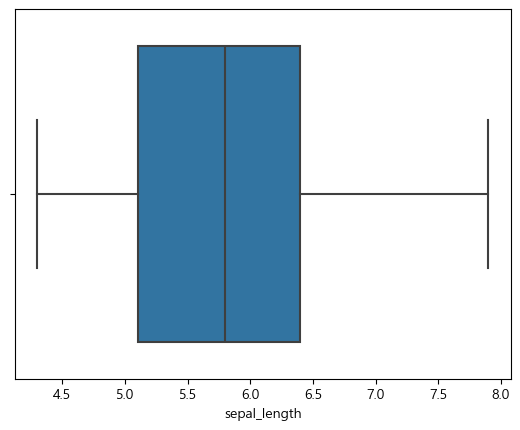

In [58]:
sns.boxplot(data=iris, x='sepal_length')

#### sns.boxplot()의 data, x, y 인수
- x : 범주(수치)형 변수
- y : 수치(범주)형 변수
- data : x,y에 지정한 변수를 가진 데이터프레임

<Axes: xlabel='sepal_width', ylabel='species'>

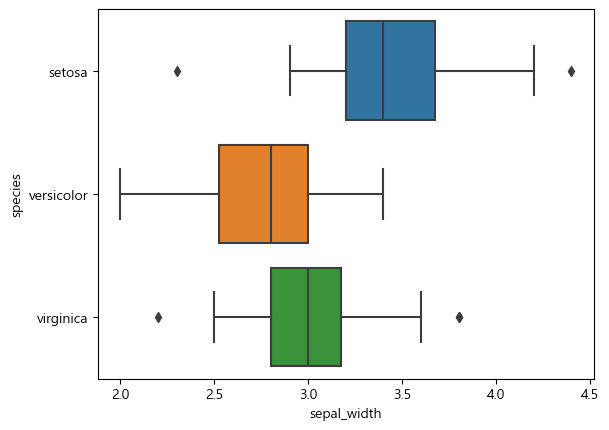

In [59]:
sns.boxplot(data=iris, x='sepal_width', y='species')

<Axes: xlabel='species', ylabel='sepal_width'>

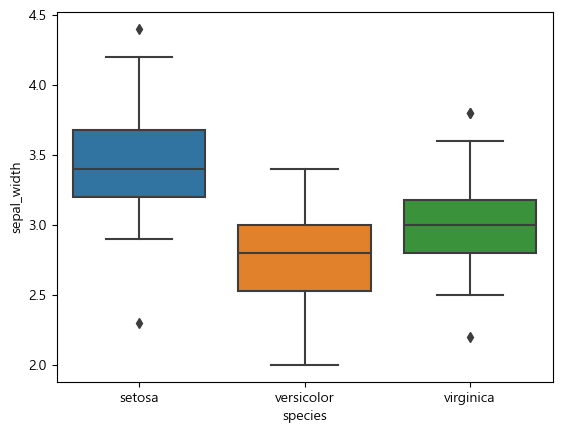

In [61]:
sns.boxplot(data=iris, y='sepal_width', x='species')

#### sns.boxplot()의 order인수로 박스플롯 순서 변경

<Axes: xlabel='sepal_width', ylabel='species'>

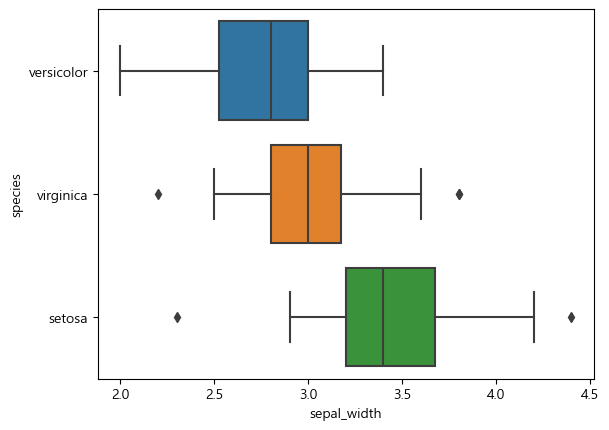

In [62]:
sns.boxplot(data=iris, x='sepal_width', y='species', order=['versicolor','virginica','setosa'])

<Axes: >

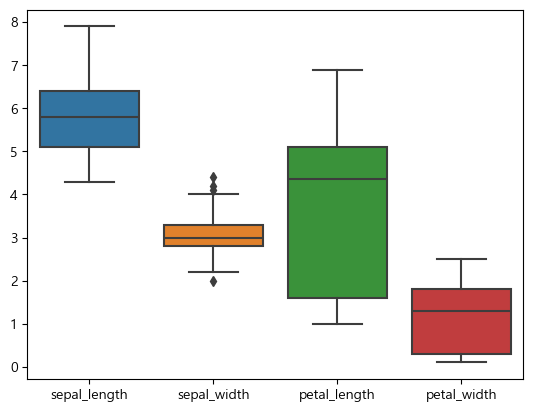

In [63]:
sns.boxplot(data=iris)

#### sns.boxplot()의 orient인수로 박스플롯 방향 변경
- orient = 'h' | 'v'

<Axes: >

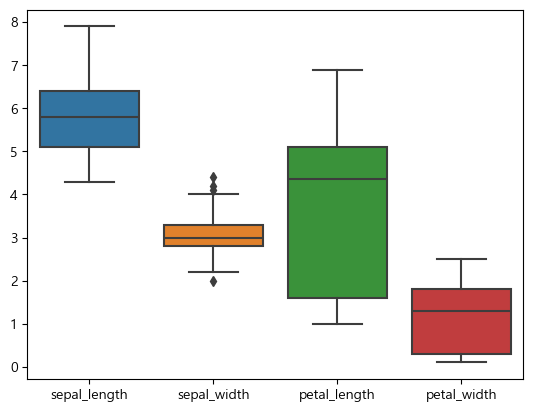

In [65]:
sns.boxplot(data=iris, orient='v')

<Axes: >

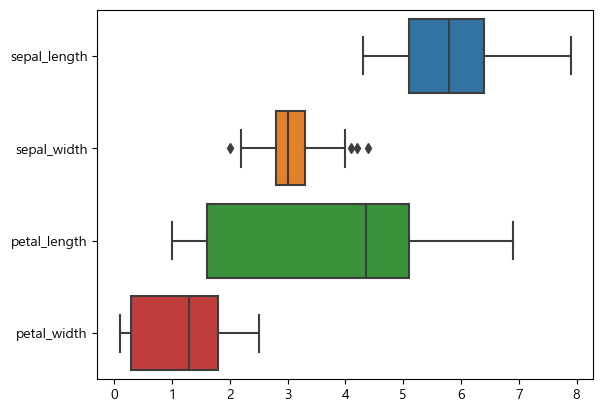

In [66]:
sns.boxplot(data=iris, orient='h')

### 3) 이변량 분포(bivariate distribution)

- 이변량 자료 : 두 변수로 이루어진 분포

### seaborn의 histplot()

<Axes: xlabel='petal_length', ylabel='petal_width'>

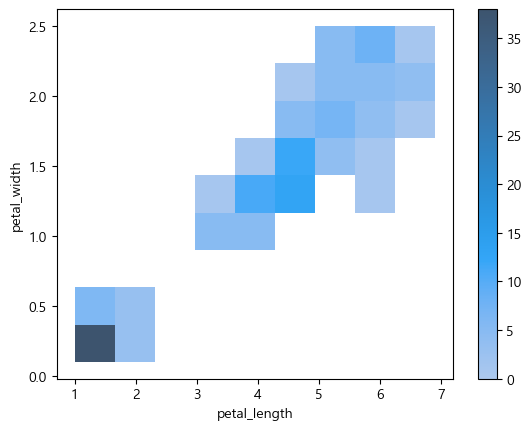

In [68]:
sns.histplot(data=iris, x='petal_length', y='petal_width', cbar=True)

### seaborn의 displot()

- 형식 : displot(x, y, data, ...)
- https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

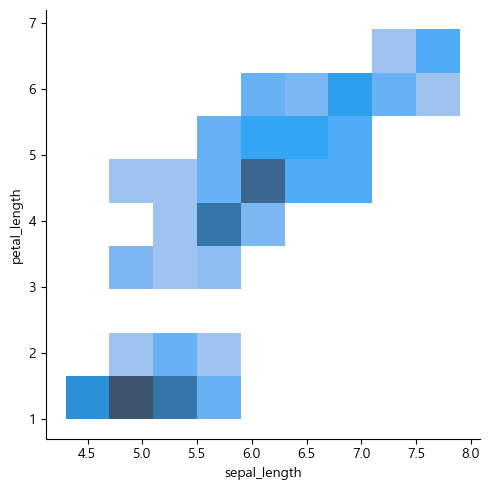

In [69]:
sns.displot(data=iris, x='sepal_length', y='petal_length')

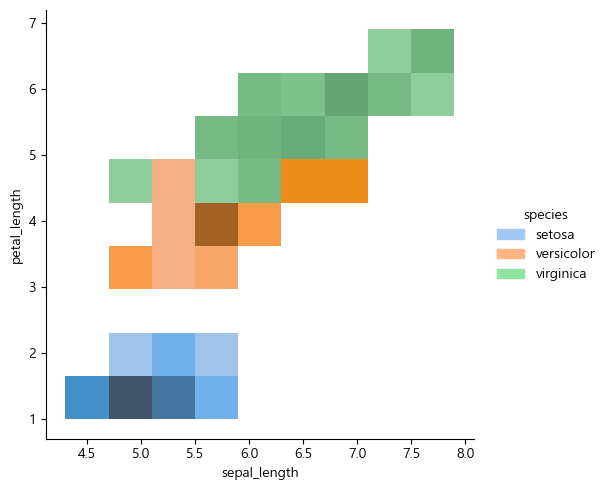

In [71]:
sns.displot(data=iris, x='sepal_length', y='petal_length', hue='species',
           palette='pastel')

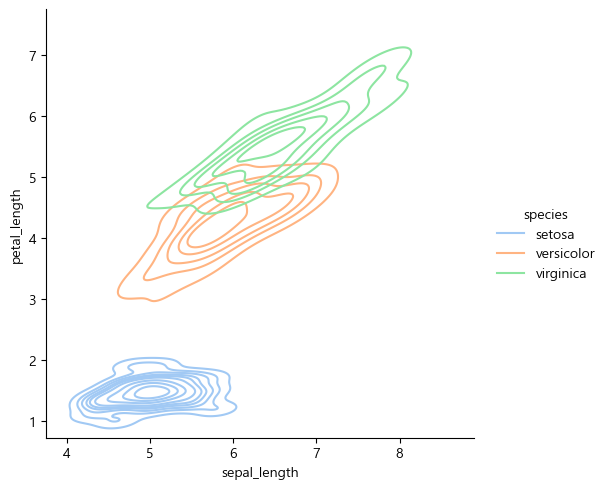

In [72]:
sns.displot(data=iris, x='sepal_length', y='petal_length', hue='species',
            kind='kde',
           palette='pastel')

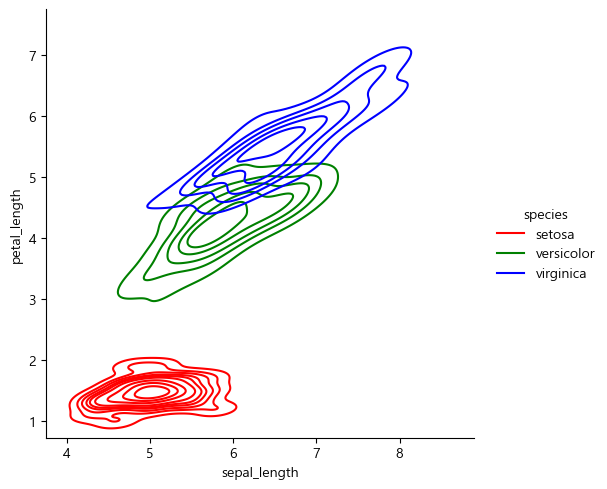

In [73]:
sns.displot(data=iris, x='sepal_length', y='petal_length', hue='species',
            kind='kde', palette=['red', 'green', 'blue'])

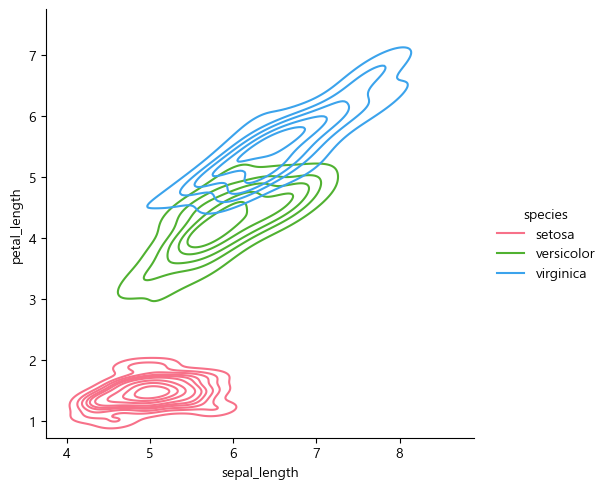

In [74]:
sns.displot(data=iris, x='sepal_length', y='petal_length', hue='species',
            kind='kde', palette='husl')

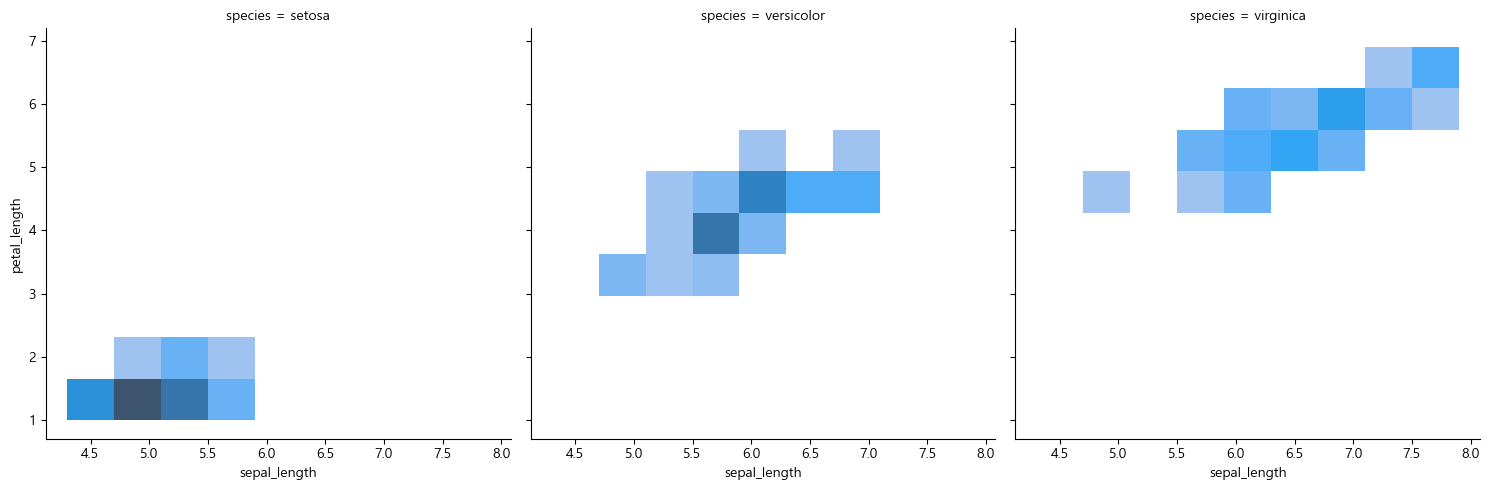

In [75]:
sns.displot(data=iris, x='sepal_length', y='petal_length', col='species')

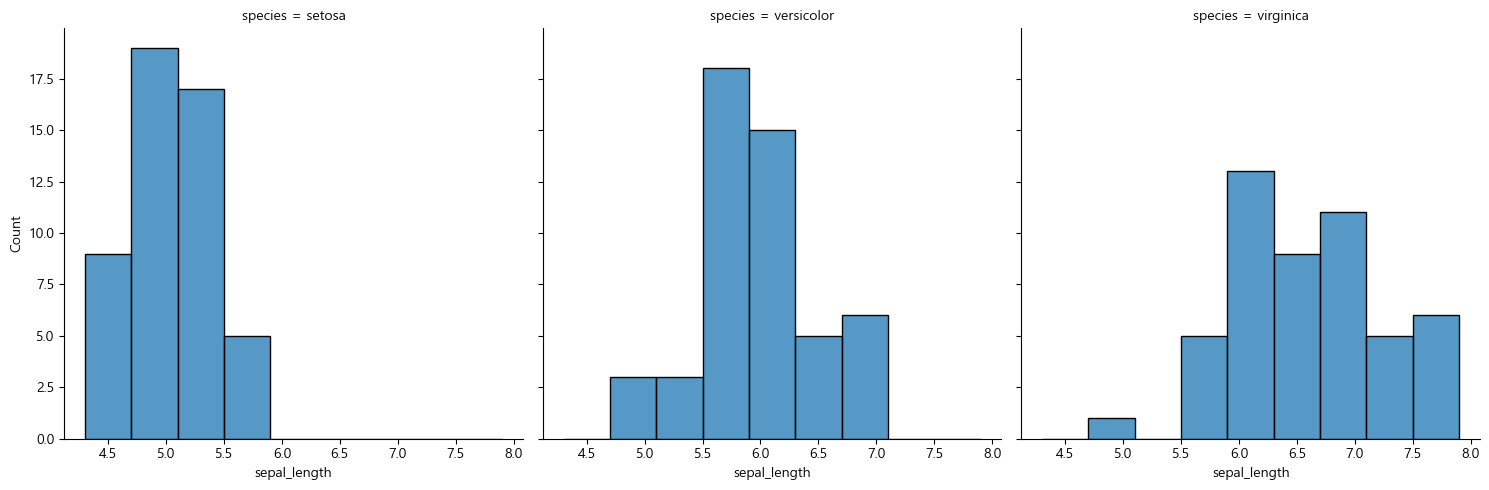

In [76]:
sns.displot(data=iris, x='sepal_length', col='species')

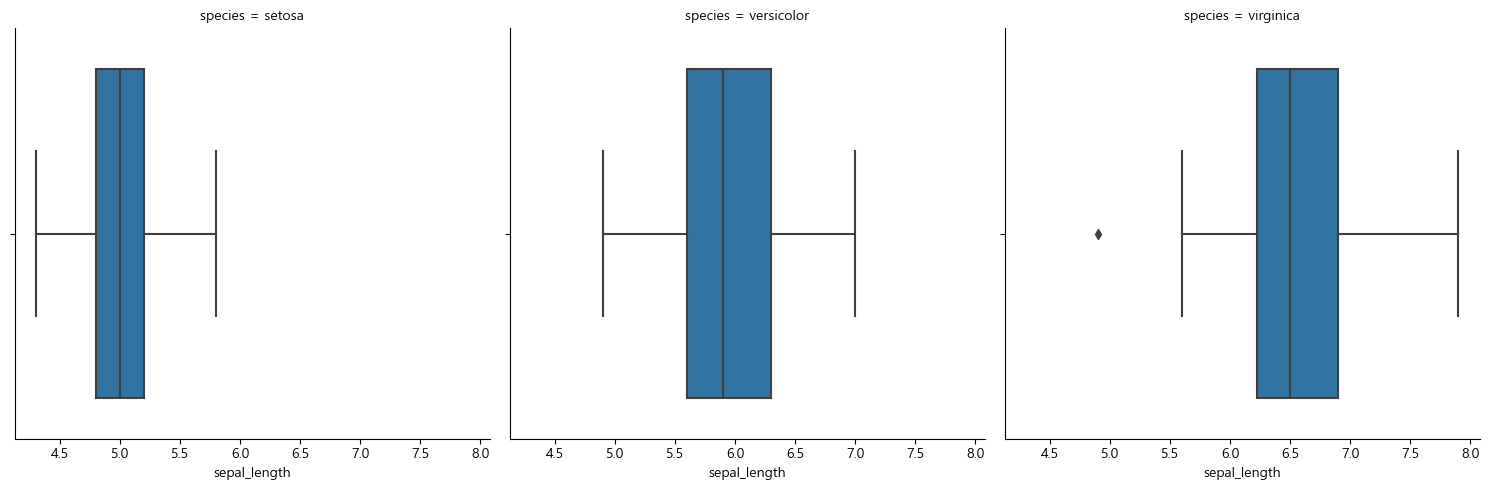

In [77]:
sns.catplot(kind='box', data=iris, x='sepal_length', col='species')

#### 참고. seaborn.ecdfplot()

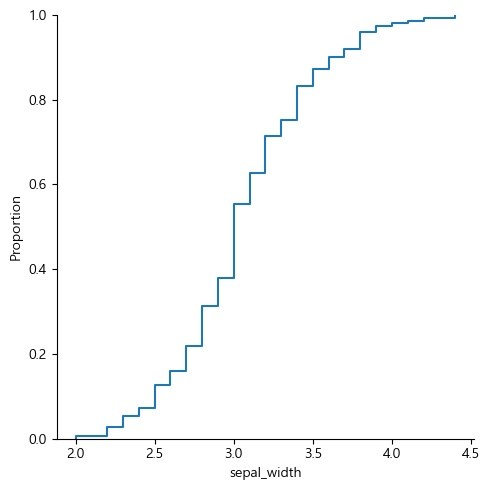

In [78]:
sns.displot(kind='ecdf', data=iris, x='sepal_width')

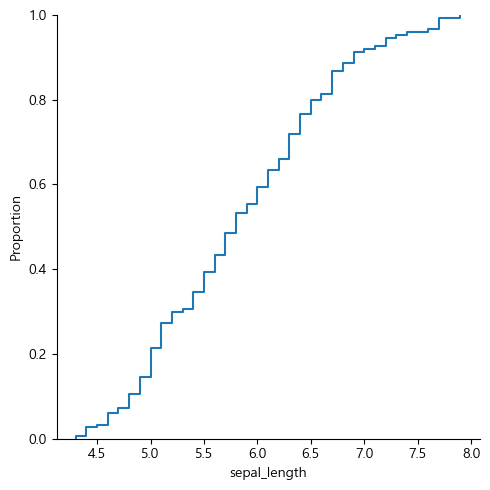

In [79]:
sns.displot(kind='ecdf', data=iris, x='sepal_length')

----

## 2. 데이터의 관계 파악

- 변수간 상관성(선형성) 파악
- 변수들간의 관계성 파악

- 산점도(scatter plot)
    - matplotlib.pyplot.scatter()
    - matplotlib.pyplot.plot()
    - seaborn.scatterplot()
    - seaborn.relplot(kind='scatter')
    - seaborn.regplot()
    - DataFrame.plot(kind='scatter')
    - DataFrame.plot.scatter()

- 버블플롯(bubble plot)
    - matplotlib.pyplot.scatter(, s= ,)
    - seaborn.scatterplot(, size= ,)
    - seaborn.relplot(kind='scatter', size= ,)

    

- 산점도행렬(scatterplot matrix)
    - seaborn.pariplot()
    - pandas.plotting.scatter_matrix()

### 1) 산점도(scatter plot)

- 두 변수간의 선형성 파악
- 두 변수는 수치형 데이터

In [80]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### ① matplotlib.pyplot의 산점도 함수

- 형식.
    - scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None,...)

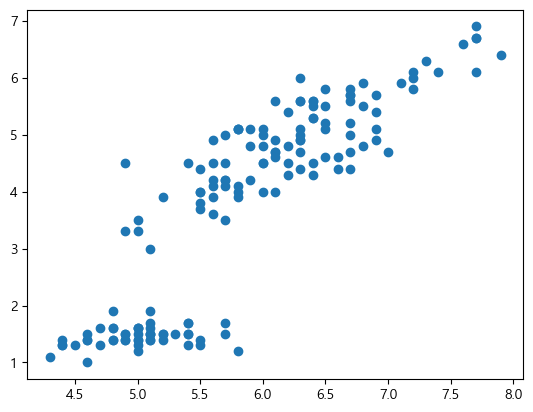

In [81]:
plt.scatter(iris.sepal_length, iris.petal_length)
plt.show()

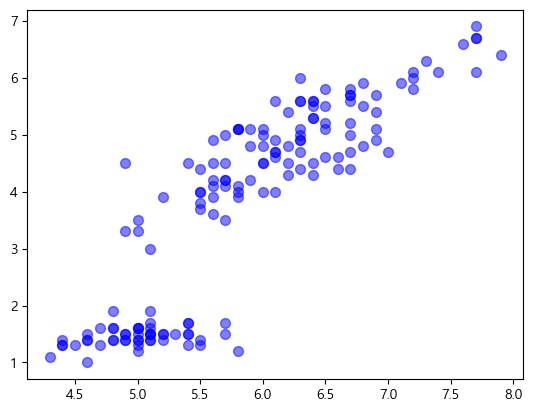

In [85]:
plt.scatter(data=iris, x='sepal_length', y='petal_length', s=50, c='blue', alpha=0.5)
plt.show()

### ② pandas의 plot.scatter() 함수이용하여 산점도 그리기

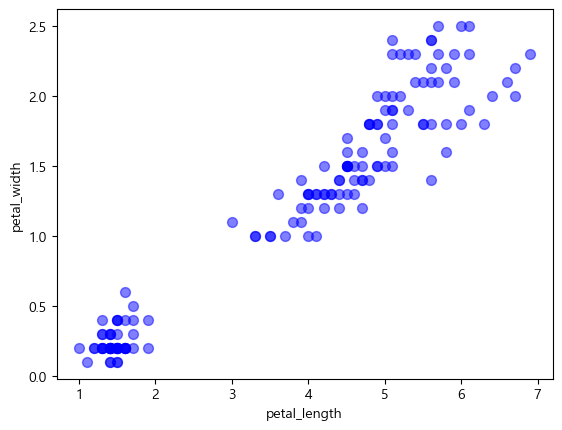

In [86]:
iris.plot.scatter(x='petal_length', y='petal_width', s=50, c='blue', alpha=0.5)
plt.show()

### ② seaborn의 산점도 함수

- 형식1.
    - scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, ... )
    - https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

    
- 형식2.
    - relplot(kind='scatter', x=None, y=None, hue=None, size=None, data=None, ... )
    - https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot
    
    
- 형식3.
    - regplot(x=None, y=None, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95,...)
    - https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot

### sns.scatterplot()

<Axes: xlabel='sepal_length', ylabel='petal_length'>

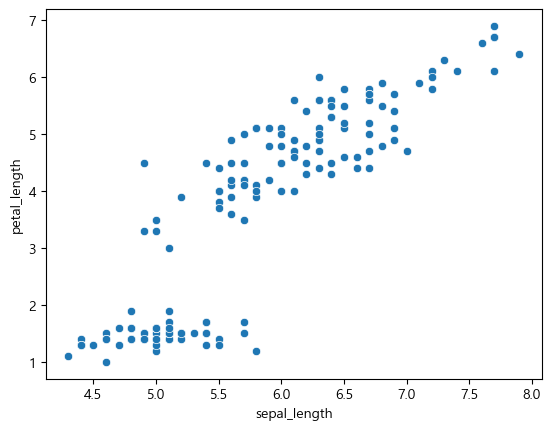

In [87]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length')

#### sns.scatterplot()의 hue 인수
- 범주형 변수의 범주에 따라 다른 색상으로 표시

<Axes: xlabel='sepal_length', ylabel='petal_length'>

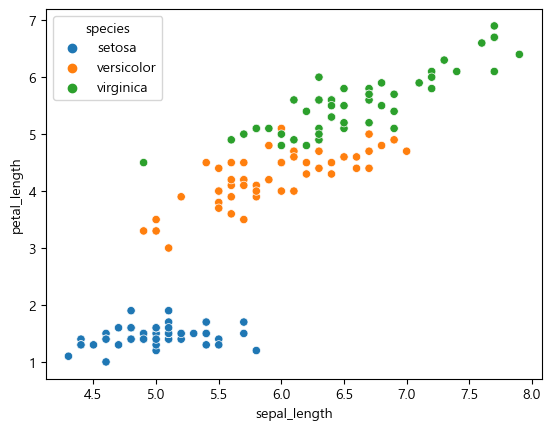

In [88]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species')

#### sns.scatterplot()의 style 인수
- 범주형 변수의 범주에 따라 마커 모양을 다르게 표현

<Axes: xlabel='sepal_length', ylabel='petal_length'>

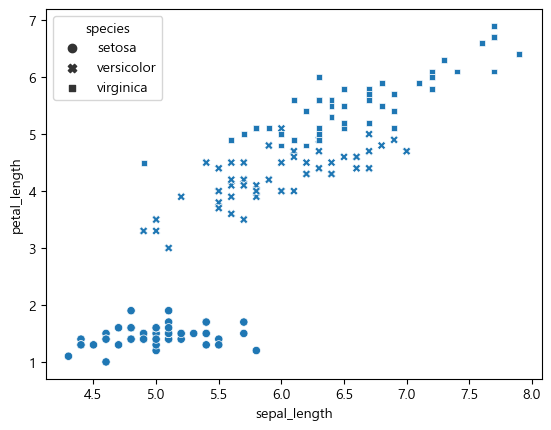

In [89]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length',
               style='species')

In [90]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='sepal_length', ylabel='petal_length'>

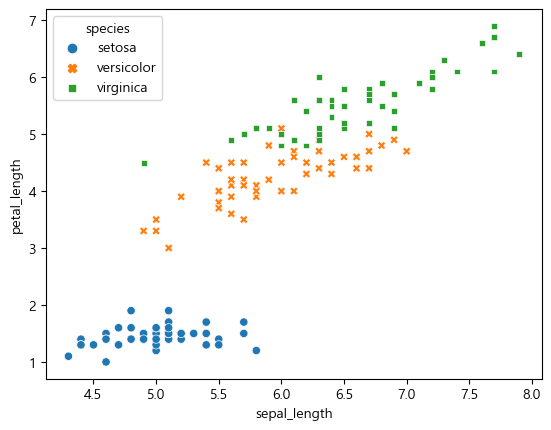

In [91]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species',
               style='species')

#### sns.scatterplot()의 s인수로 마커 크기 변경

<Axes: xlabel='sepal_length', ylabel='petal_length'>

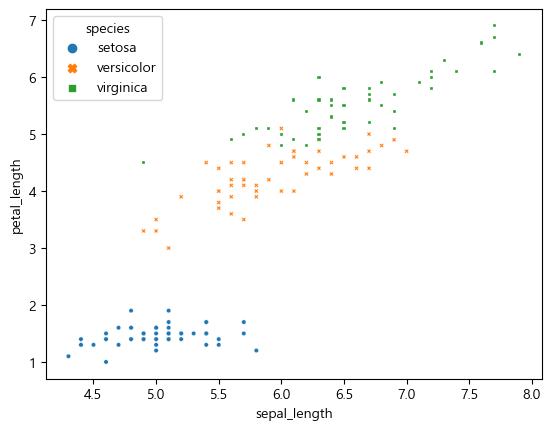

In [93]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species',
               style='species', s=10)

#### scatterplot()함수의 alpha 인수를 이용하여 스타일 변경

<Axes: xlabel='sepal_length', ylabel='petal_length'>

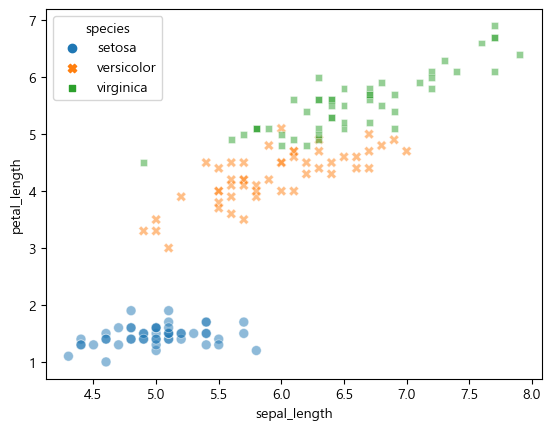

In [94]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species',
               style='species', s=50, alpha=0.5)

#### scatterplot함수의 size인수

<Axes: xlabel='sepal_length', ylabel='petal_length'>

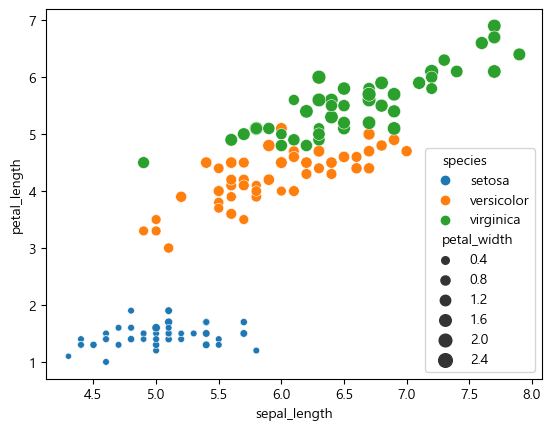

In [96]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species',
               size='petal_width', sizes=(20,100))

### sns.relplot(kind='scatter')

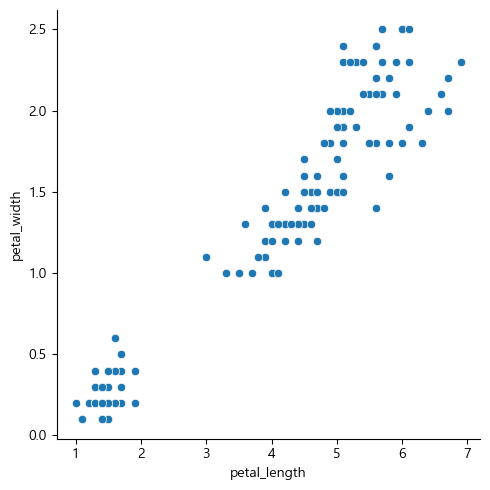

In [97]:
sns.relplot(kind='scatter', data=iris, x='petal_length', y='petal_width')

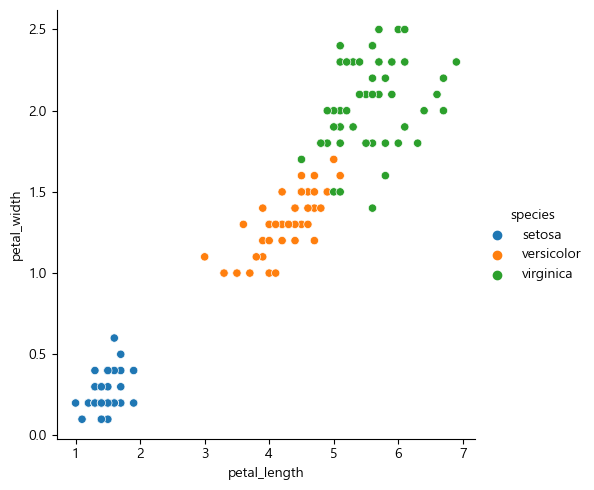

In [98]:
sns.relplot(kind='scatter', data=iris, x='petal_length', y='petal_width', hue='species')

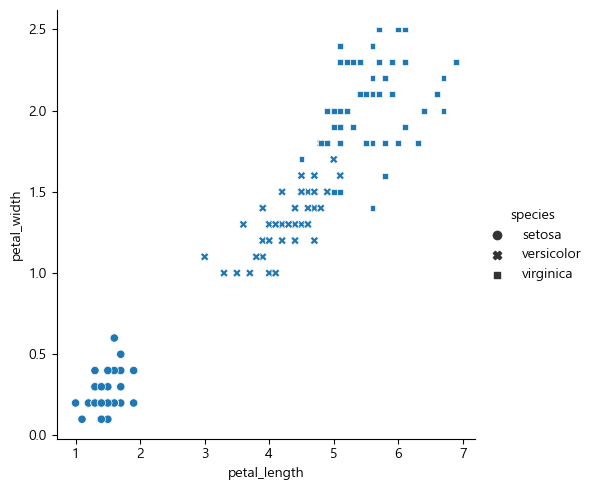

In [99]:
sns.relplot(kind='scatter', data=iris, x='petal_length', y='petal_width', style='species')

#### sns.scatterplot()의 palette 인수

- seaborn에서 제공되는 팔레트 : https://seaborn.pydata.org/tutorial/color_palettes.html

In [100]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [101]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

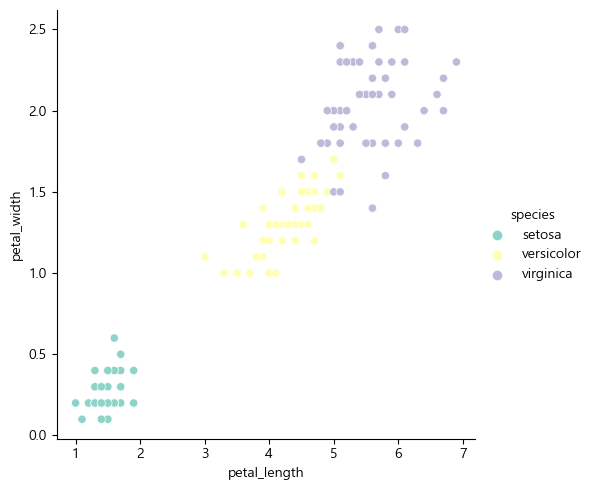

In [102]:
sns.relplot(kind='scatter', data=iris, x='petal_length', y='petal_width', hue='species',
           palette='Set3')

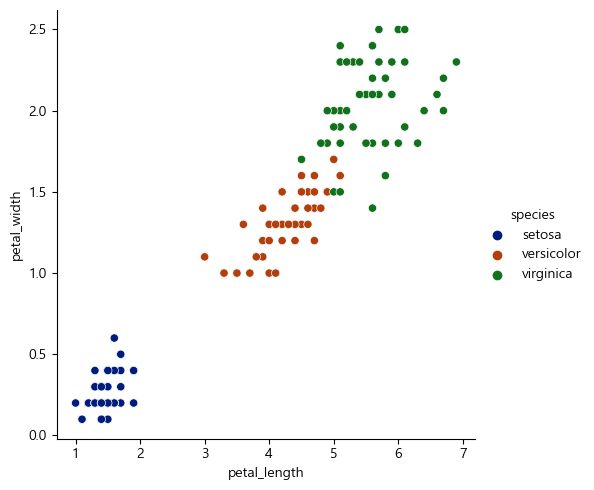

In [104]:
sns.relplot(kind='scatter', data=iris, x='petal_length', y='petal_width', hue='species',
           palette='dark')

- relplot()의 col인수

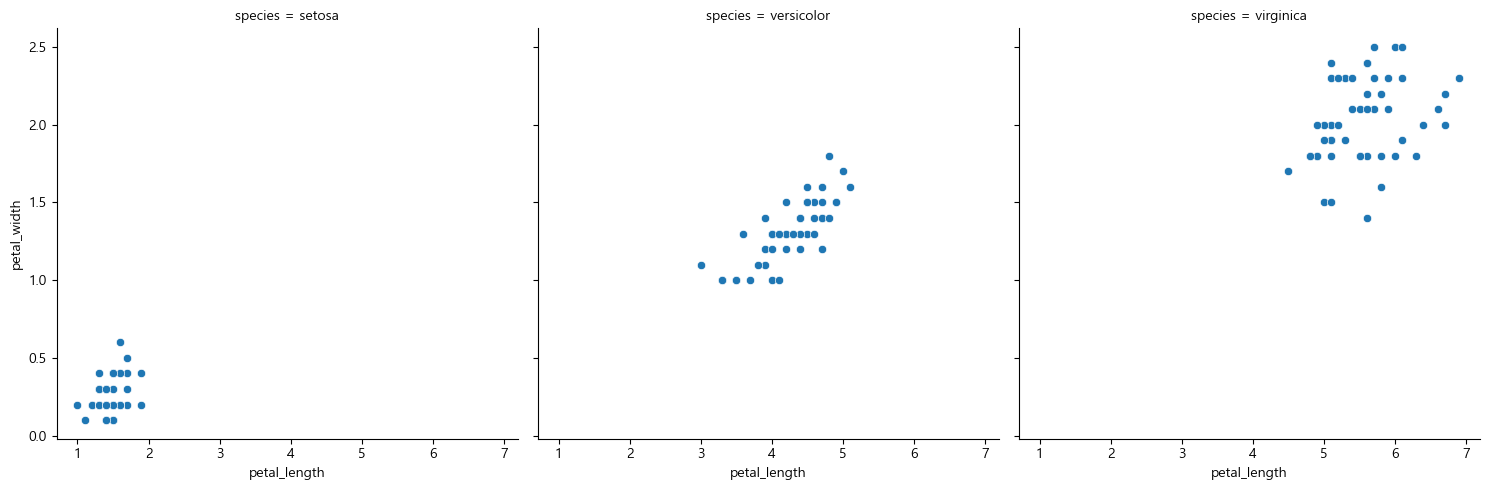

In [106]:
sns.relplot(kind='scatter', data=iris, x='petal_length', y='petal_width', col='species')

### regplot()함수를 이용하여 산점도 그리기
- 선형회귀 적합 선을 포함시키지 않으려면 fit_reg=False

Text(0.5, 1.0, '산점도')

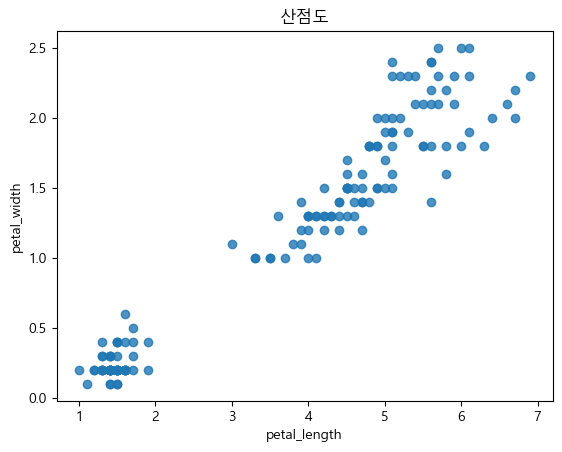

In [109]:
sns.regplot(x=iris.petal_length, y=iris.petal_width, fit_reg=False)
plt.title('산점도')

- regplot()의 fit_reg=True

<Axes: xlabel='petal_length', ylabel='petal_width'>

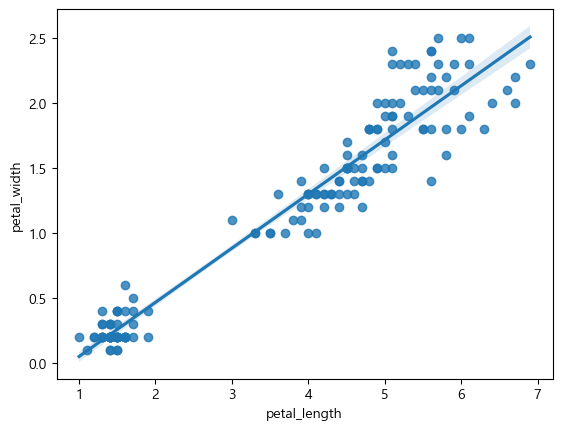

In [110]:
sns.regplot(x=iris.petal_length, y=iris.petal_width, fit_reg=True)

In [111]:
diamonds = sns.load_dataset("diamonds")
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [112]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: xlabel='price'>

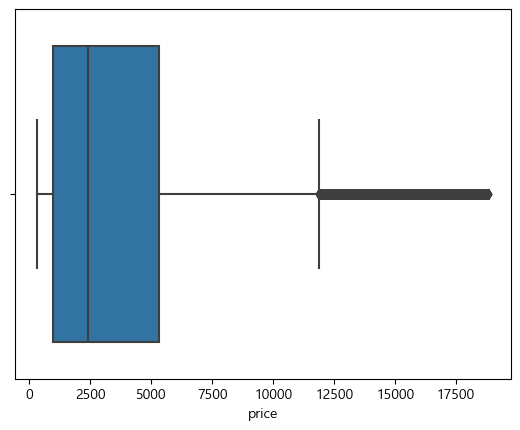

In [113]:
sns.boxplot(data=diamonds, x='price')

<Axes: xlabel='price', ylabel='Count'>

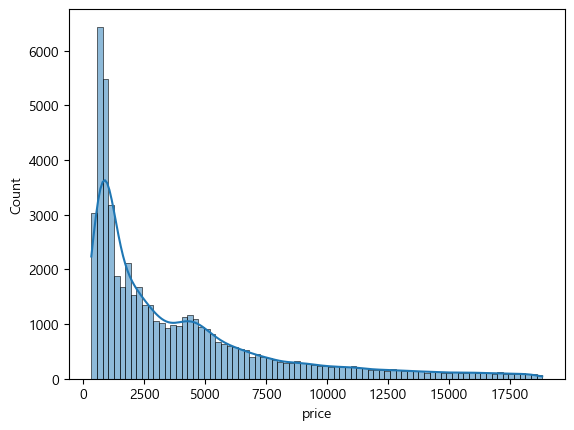

In [114]:
sns.histplot(data=diamonds, x='price', kde=True)

<Axes: xlabel='price', ylabel='Density'>

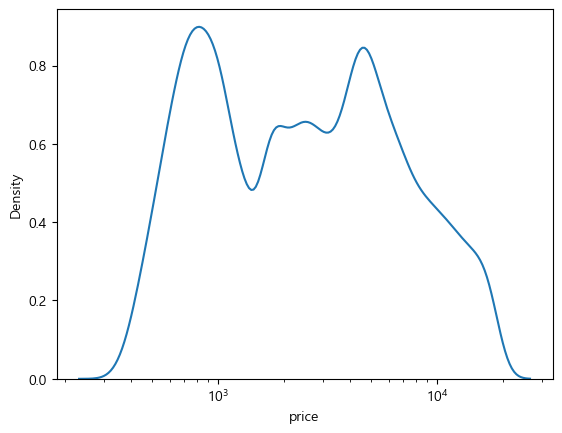

In [115]:
sns.kdeplot(data=diamonds, x='price', log_scale=True)

### 2) 산점도 행렬(scatter plot matrix) 그리기

- 여러 개의 연속형 변수에 대해서 두 변수씩 쌍을 이루는 산점도를 그려 한꺼번에 변수 간 관계를 일목요연하게 볼 수 있음

###  ① seaborn.pairplot()을 이용한 산점도 행렬

- 형식 : pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)


- https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

#### pairplot()의 인수를 이용한 산점도 행렬1
- diag_kind='hist'를 설정하여 대각원소 자리에 각 변수별 히스토그램 그리기

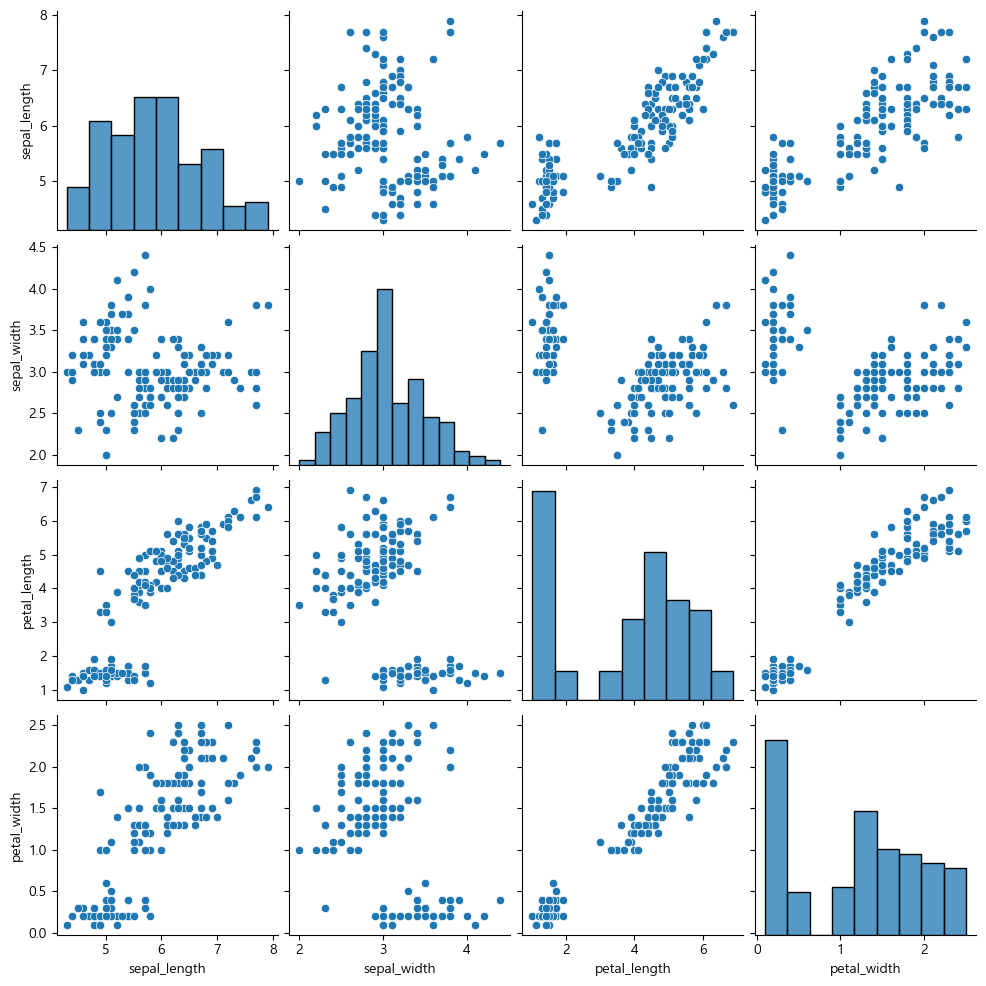

In [120]:
sns.pairplot(data=iris)

#### pairplot()의 인수를 이용한 산점도 행렬2
- diag_kind='kde' : 각 변수별 커널밀도추정곡선 그림
- hue='species' : 'species'(setosa, versicolor, virginica) 별로 색깔을 다르게 표시
- 색깔은 palette 에 'bright', 'pastel', 'deep', 'muted', 'colorblind', 'dark' 중에서 가독성이 좋고 선호하는 색상으로 선택 

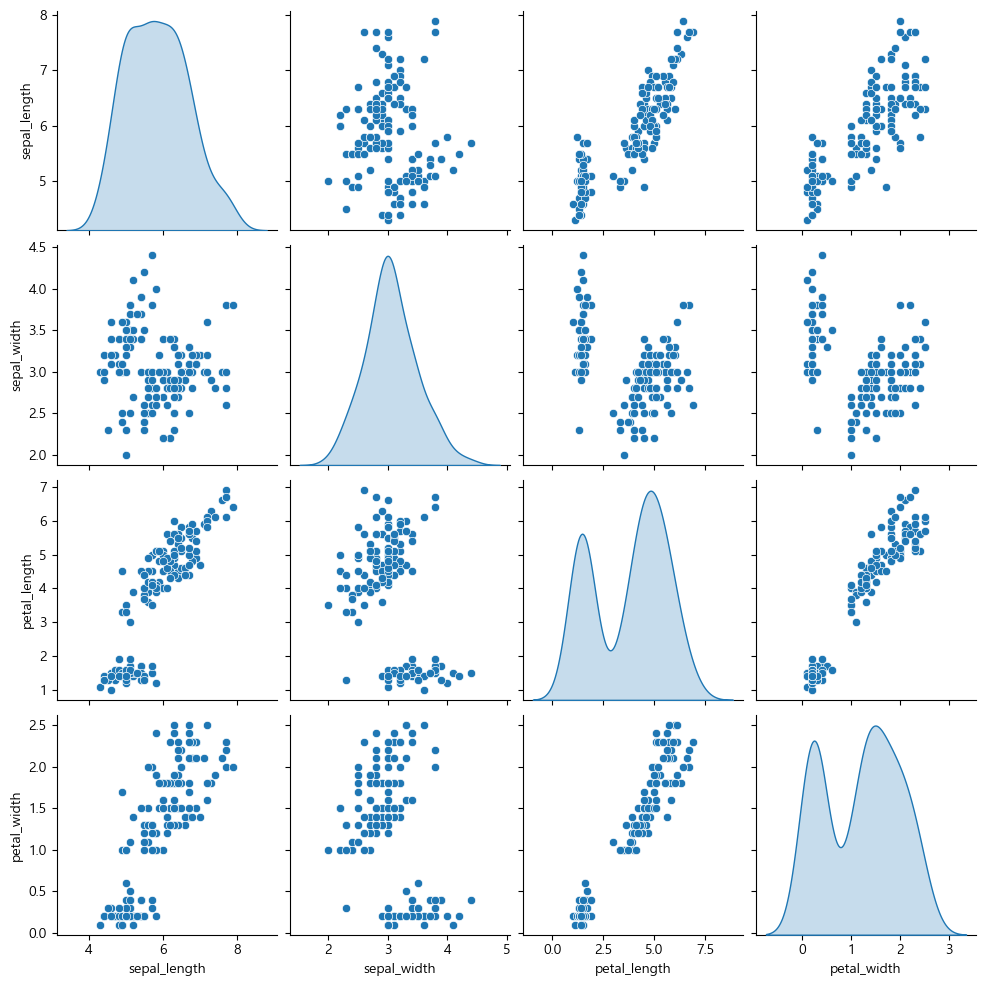

In [121]:
sns.pairplot(iris, diag_kind='kde')

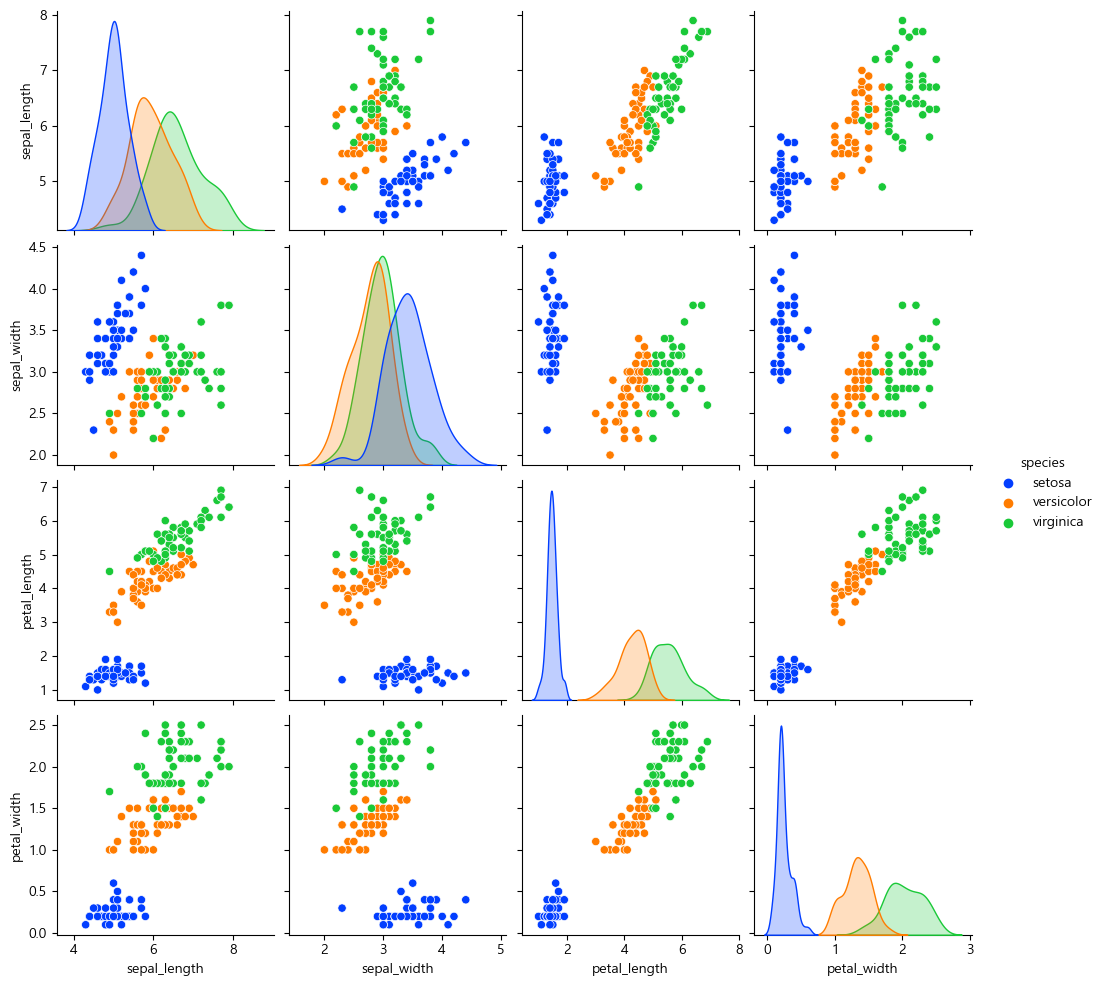

In [123]:
sns.pairplot(iris, diag_kind='kde', hue='species', palette='bright')

### ② pandas.plotting 의 scatter_matrix() 함수를 사용하여 산점도 행렬

- 형식 : scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwargs)


- https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

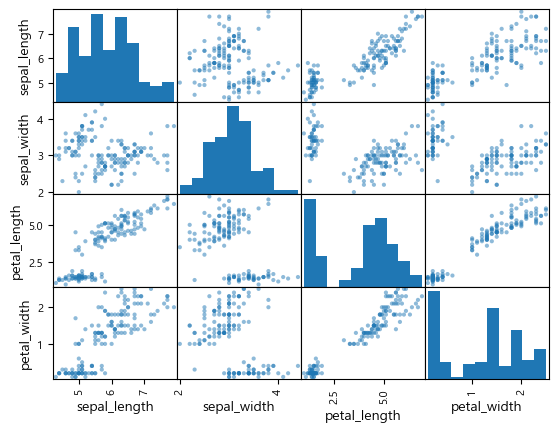

In [117]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris)
plt.show()

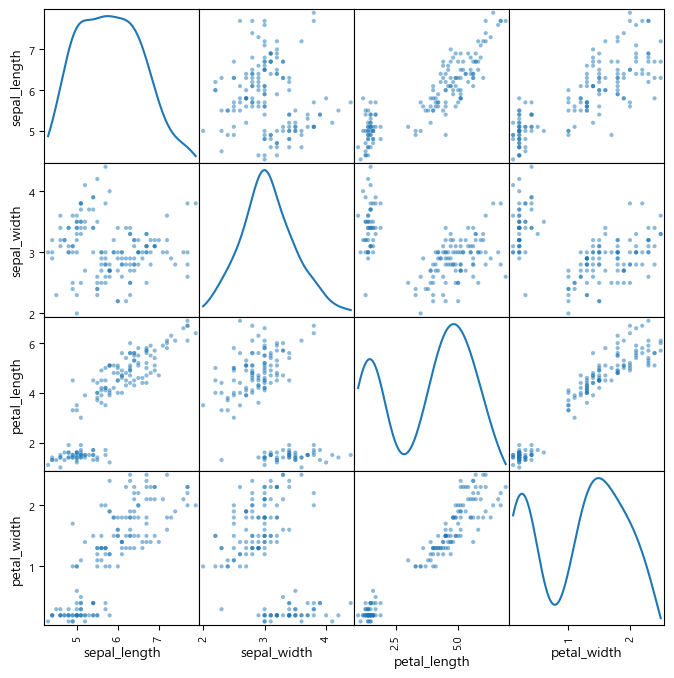

In [119]:
scatter_matrix(iris, diagonal='kde', figsize=(8,8))
plt.show()

### 3) 버블 플롯

- 산점도에서 x, y이외의 다른 변수를 포인트의 크기로 매핑하여 변수들간의 관계를 파악하게 함

### ① matplotlib.pyplot의 scatter()를 이용한 버블플롯 

- scatter()의 s 인수 사용

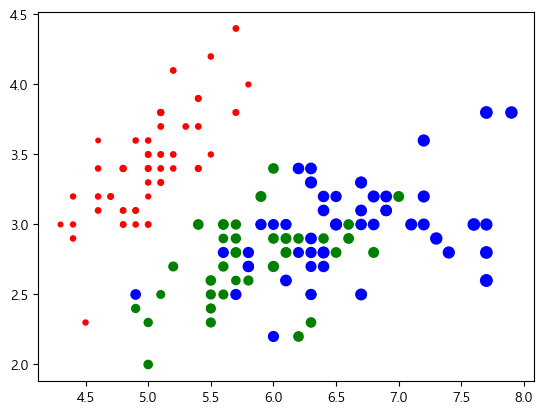

In [127]:
#
sizes = iris.petal_length * 10
colors = ['r']*50 + ['g']*50 + ['b']*50
plt.scatter(data=iris, x='sepal_length', y='sepal_width', s=sizes, c=colors)
plt.show()

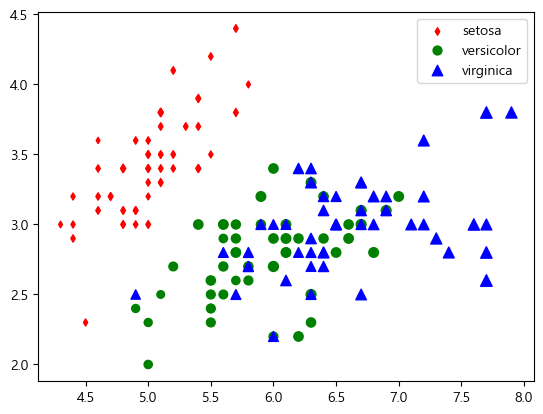

In [130]:
sizes = iris.petal_length * 10
colors = ['r','g','b']
markers = ['d','o','^']
values = ['setosa','versicolor','virginica']
for i in range(3):
    df = iris[iris.species == values[i]]
    x = df.sepal_length
    y = df.sepal_width
    s = df.petal_length * 10
    plt.scatter(x, y, s=s, c=colors[i], marker=markers[i], label=values[i])
plt.legend()
plt.show()

### ② seaborn의 산점도 함수를 이용한 버블 플롯

- sns.scatterplot() 또는 relplot()의 size인수 사용

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

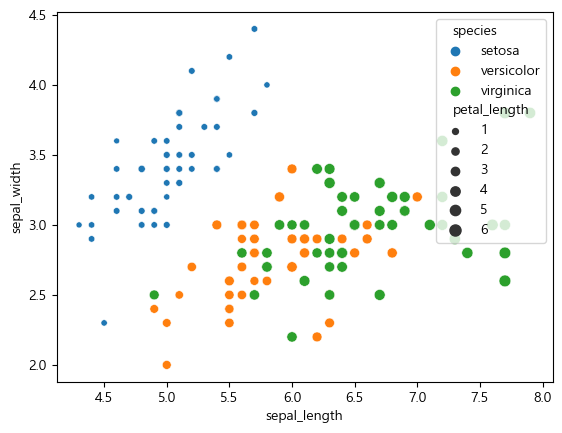

In [134]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species',
               size='petal_length')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

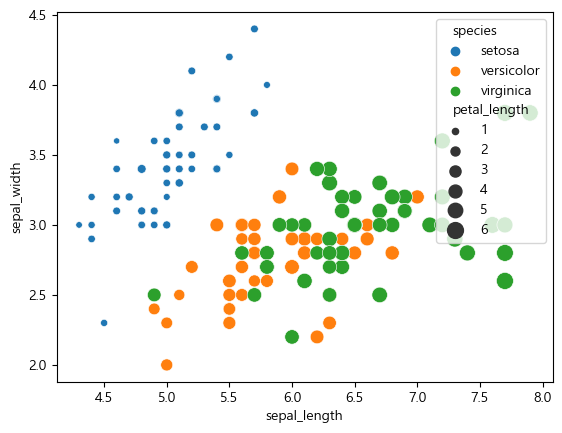

In [135]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species',
               size='petal_length', sizes=(20,150))

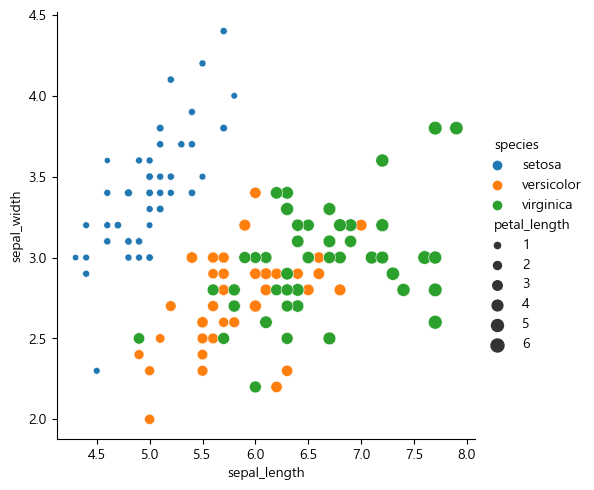

In [136]:
sns.relplot(kind='scatter', data=iris, x='sepal_length', y='sepal_width', hue='species',
               size='petal_length', sizes=(20,100))

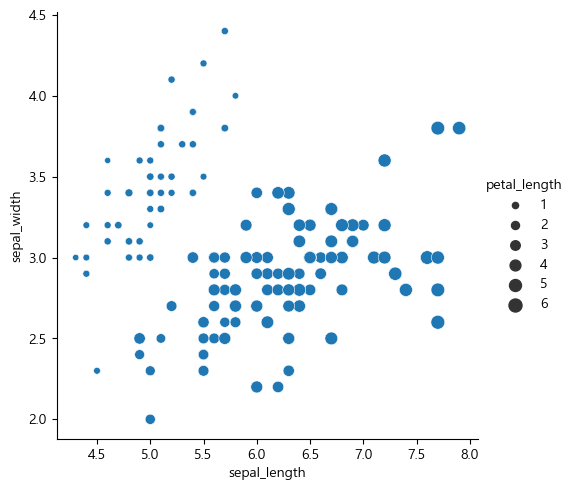

In [137]:
sns.relplot(kind='scatter', data=iris, x='sepal_length', y='sepal_width',
               size='petal_length', sizes=(20,100))

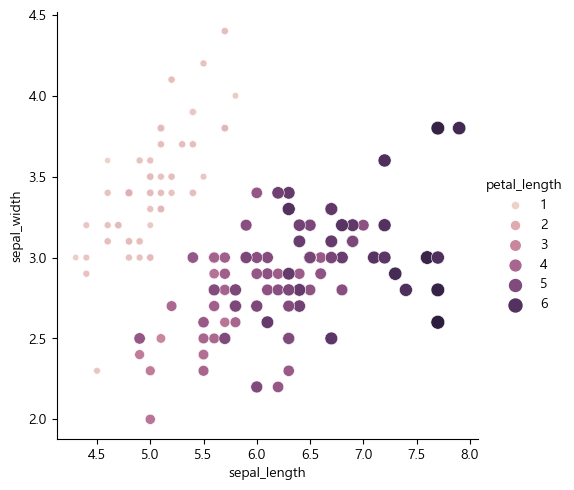

In [138]:
sns.relplot(kind='scatter', data=iris, x='sepal_length', y='sepal_width', hue='petal_length',
               size='petal_length', sizes=(20,100))

------